<a href="https://colab.research.google.com/github/DmitriiR233/Exam-DataScince/blob/main/Exam_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **В ГЛАВНЫХ РОЛЯХ: Дмитрий(Самый КРРРААААСИВЫЙ мужик в мире) и Аза(он просто Азамат )**

# **ИМПОРТ И ЗАГРУЗКА ДАННЫХ**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Indian_Climate_Dataset_2024_2025.csv')
df.shape  # Размер датасета

(7310, 13)

In [ ]:
df.head() #первые строки

,Date,City,State,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,AQI_Category,Pressure (hPa),Cloud_Cover (%)
0,2024-01-01,Mumbai,Maharashtra,32.5,18.0,25.2,77.6,0.0,3.3,259,Poor,1020.3,62.1
1,2024-01-01,Delhi,Delhi,25.4,10.7,18.1,84.1,0.0,9.0,130,Moderate,1008.4,46.0
2,2024-01-01,Bengaluru,Karnataka,37.2,30.8,34.0,49.0,3.7,6.6,54,Satisfactory,1008.0,61.3
3,2024-01-01,Chennai,Tamil Nadu,37.2,30.4,33.8,34.2,9.5,9.0,176,Moderate,993.4,70.0
4,2024-01-01,Kolkata,West Bengal,27.4,17.5,22.5,32.2,9.1,9.2,97,Satisfactory,1008.2,56.9


In [ ]:
df.info() #типы колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  7310 non-null   object 
 1   City                  7310 non-null   object 
 2   State                 7310 non-null   object 
 3   Temperature_Max (°C)  7310 non-null   float64
 4   Temperature_Min (°C)  7310 non-null   float64
 5   Temperature_Avg (°C)  7310 non-null   float64
 6   Humidity (%)          7310 non-null   float64
 7   Rainfall (mm)         7310 non-null   float64
 8   Wind_Speed (km/h)     7310 non-null   float64
 9   AQI                   7310 non-null   int64  
 10  AQI_Category          7310 non-null   object 
 11  Pressure (hPa)        7310 non-null   float64
 12  Cloud_Cover (%)       7310 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 742.6+ KB


In [ ]:
df.describe() #статистиа числовых колонок

,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,Pressure (hPa),Cloud_Cover (%)
count,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000
mean,34.952161,25.006402,29.980192,62.653516,8.231300,13.522763,193.759508,1007.358577,52.630055
std,5.781372,6.476264,5.966698,18.680171,17.758208,6.562729,89.182569,10.109978,27.327729
min,25.000000,10.100000,17.600000,30.000000,0.000000,2.000000,40.000000,990.000000,5.000000
25%,30.000000,19.900000,25.000000,46.400000,0.000000,7.900000,116.000000,998.700000,28.925000
50%,34.900000,25.000000,30.000000,62.700000,0.000000,13.500000,194.000000,1007.300000,52.700000
75%,40.000000,30.000000,35.000000,78.700000,6.300000,19.100000,270.000000,1016.200000,76.200000
max,45.000000,39.800000,42.300000,95.000000,79.900000,25.000000,349.000000,1025.000000,100.000000


In [ ]:
df['City'].value_counts() #кол-во записей по городам

,count
City,
Mumbai,731
Delhi,731
Bengaluru,731
Chennai,731
Kolkata,731
Hyderabad,731
Ahmedabad,731
Jaipur,731
Lucknow,731


# **ПРОВЕРКА НА ДУБЛИКАТЫ И ПРОПУСКИ**

In [ ]:
df.isnull().sum() #пропуски

,0
Date,0
City,0
State,0
Temperature_Max (°C),0
Temperature_Min (°C),0
Temperature_Avg (°C),0
Humidity (%),0
Rainfall (mm),0
Wind_Speed (km/h),0
AQI,0


In [ ]:
df.duplicated().sum() #дубликаты

np.int64(0)

# **ПОДГОТОВКА ФИЧЕЙ ДЛЯ РЕГРЕССИИ**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Берем числовые колонки (фичи) и цель
features = ['Temperature_Max (°C)', 'Temperature_Min (°C)', 'Humidity (%)', 'Rainfall (mm)',
            'Wind_Speed (km/h)', 'AQI', 'Pressure (hPa)', 'Cloud_Cover (%)']
X_raw = df[features].values  # Матрица фичей (N строк x 8 колонок)
y = df['Temperature_Avg (°C)'].values.reshape(-1, 1)  # Цель (столбец температур)

print(f"X: {X_raw.shape}, y: {y.shape}")

X: (7310, 8), y: (7310, 1)


# **НОРМАЛИЗАЦИЯ ДАННЫХ**

In [ ]:
features = ['Temperature_Max (°C)', 'Temperature_Min (°C)', 'Humidity (%)', 'Rainfall (mm)',
            'Wind_Speed (km/h)', 'AQI', 'Pressure (hPa)', 'Cloud_Cover (%)']

X_raw = df[features].values
y = df['Temperature_Avg (°C)'].values.reshape(-1, 1)

# Нормализация (по всей выборке)
X_mean = X_raw.mean(axis=0)
X_std  = X_raw.std(axis=0)
X_norm = (X_raw - X_mean) / (X_std + 1e-8)

# Добавляем bias
X_full = np.c_[np.ones(X_norm.shape[0]), X_norm]

m = X_full.shape[0]
print("X_full shape:", X_full.shape, "y shape:", y.shape)

X_full shape: (7310, 9) y shape: (7310, 1)


# **ЛИНЕЙНАЯ РЕГРЕССИЯ С Mini-batch**

In [ ]:
from math import floor

np.random.seed(42)
indices = np.random.permutation(m)
train_size = floor(0.8 * m)

train_idx = indices[:train_size]
test_idx  = indices[train_size:]

X_train_lr, y_train_lr = X_full[train_idx], y[train_idx]
X_test_lr,  y_test_lr  = X_full[test_idx],  y[test_idx]

print("Train:", X_train_lr.shape, "Test:", X_test_lr.shape)


Train: (5848, 9) Test: (1462, 9)


In [ ]:
n_epochs = 1000
learning_rate = 0.01
batch_size = 32

n_features = X_train_lr.shape[1]
np.random.seed(42)
w_lr = np.random.randn(n_features, 1) * 0.01

losses_lr_train = []

for epoch in range(n_epochs):
    idx = np.random.permutation(X_train_lr.shape[0])

    for i in range(0, len(idx), batch_size):
        batch_idx = idx[i:min(i + batch_size, len(idx))]
        Xb = X_train_lr[batch_idx]
        yb = y_train_lr[batch_idx]

        # Предсказание: y_hat = Xb @ w
        y_hat = Xb.dot(w_lr)

        # MSE на батче
        loss = np.mean((y_hat - yb) ** 2)
        losses_lr_train.append(loss)

        # Градиент: 2/m * Xᵀ (Xw - y)
        grad = 2 * Xb.T.dot(y_hat - yb) / len(yb)

        # Обновление весов
        w_lr -= learning_rate * grad

    if epoch % 100 == 0:
        print(f"[LR] Эпоха {epoch}, train loss: {loss:.4f}")

print("Веса линейной регрессии (train):", w_lr.flatten())

[LR] Эпоха 0, train loss: 0.6235
[LR] Эпоха 100, train loss: 0.0013
[LR] Эпоха 200, train loss: 0.0013
[LR] Эпоха 300, train loss: 0.0010
[LR] Эпоха 400, train loss: 0.0012
[LR] Эпоха 500, train loss: 0.0009
[LR] Эпоха 600, train loss: 0.0012
[LR] Эпоха 700, train loss: 0.0015
[LR] Эпоха 800, train loss: 0.0016
[LR] Эпоха 900, train loss: 0.0015
Веса линейной регрессии (train): [ 2.99804960e+01  2.89199715e+00  3.23556605e+00 -9.21870269e-04
 -9.19863202e-04  1.13813395e-03 -2.84382471e-04 -8.07785891e-04
 -5.25527541e-04]


In [ ]:
# Обучающая выборка
y_train_pred = X_train_lr.dot(w_lr)
mse_train = np.mean((y_train_pred - y_train_lr) ** 2)

# Тестовая выборка
y_test_pred = X_test_lr.dot(w_lr)
mse_test = np.mean((y_test_pred - y_test_lr) ** 2)

print("MSE train:", mse_train)
print("MSE test:", mse_test)



MSE train: 0.001254880230546737
MSE test: 0.0012693867392215184


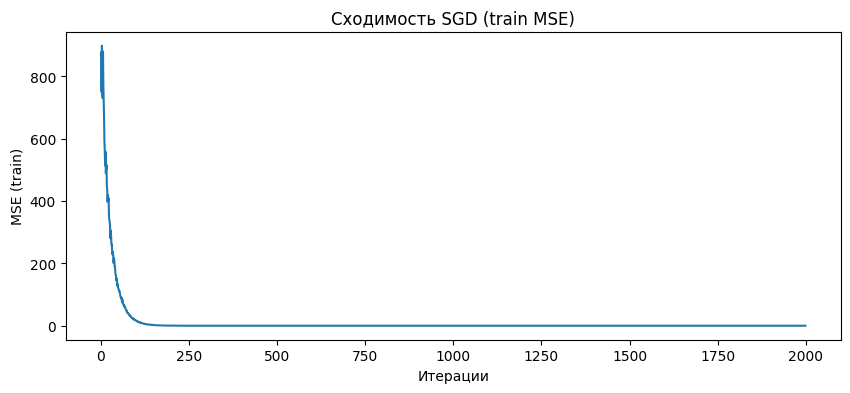

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(losses_lr_train[:2000])
plt.title('Сходимость SGD (train MSE)')
plt.xlabel('Итерации')
plt.ylabel('MSE (train)')
plt.show()


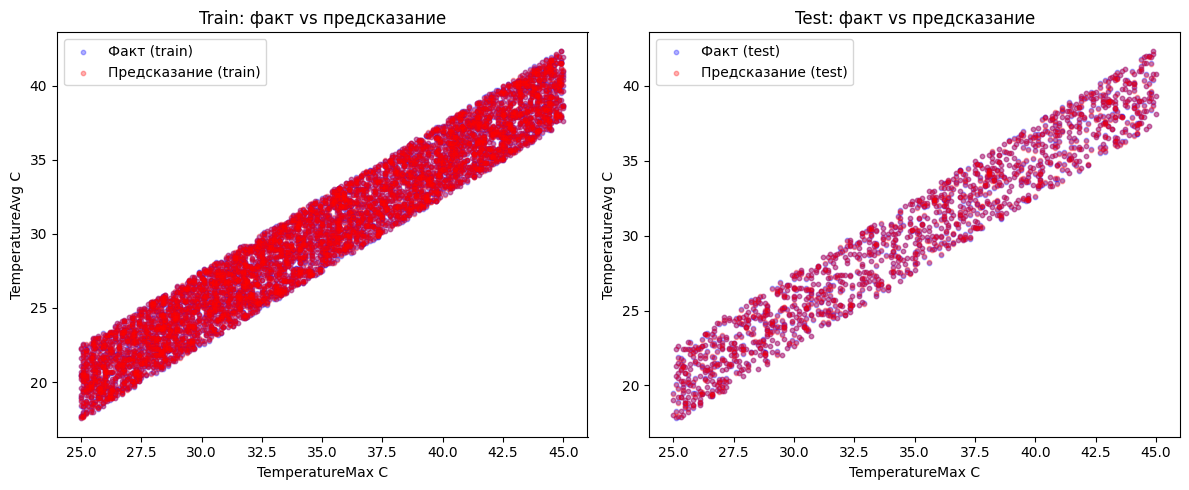

In [ ]:
# Восстановим исходный признак TemperatureMax C для train/test
temp_max_train = X_raw[train_idx, 0]
temp_max_test  = X_raw[test_idx, 0]

# Предсказания
y_train_pred = X_train_lr.dot(w_lr)
y_test_pred  = X_test_lr.dot(w_lr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(temp_max_train, y_train_lr, alpha=0.3, s=10, color='blue', label='Факт (train)')
plt.scatter(temp_max_train, y_train_pred, alpha=0.3, s=10, color='red', label='Предсказание (train)')
plt.xlabel('TemperatureMax C')
plt.ylabel('TemperatureAvg C')
plt.title('Train: факт vs предсказание')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(temp_max_test, y_test_lr, alpha=0.3, s=10, color='blue', label='Факт (test)')
plt.scatter(temp_max_test, y_test_pred, alpha=0.3, s=10, color='red', label='Предсказание (test)')
plt.xlabel('TemperatureMax C')
plt.ylabel('TemperatureAvg C')
plt.title('Test: факт vs предсказание')
plt.legend()

plt.tight_layout()
plt.show()


# **ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**

Берем фичи и делаем нормализацию

In [ ]:
# Используем те же фичи
X_raw_clf = df[features].values
temp_avg = df['Temperature_Avg (°C)'].values

# Бинарная цель: 1 — жаркий день (выше медианы), 0 — нет
threshold = np.median(temp_avg)
y_clf_full = (temp_avg > threshold).astype(int).reshape(-1, 1)

# Нормализация
X_mean_clf = X_raw_clf.mean(axis=0)
X_std_clf  = X_raw_clf.std(axis=0)
X_norm_clf = (X_raw_clf - X_mean_clf) / (X_std_clf + 1e-8)

# Добавляем bias
X_full_clf = np.c_[np.ones(X_norm_clf.shape[0]), X_norm_clf]

m_clf = X_full_clf.shape[0]
print("X_full_clf:", X_full_clf.shape, "y_clf_full:", y_clf_full.shape)

X_full_clf: (7310, 9) y_clf_full: (7310, 1)


In [ ]:
np.random.seed(42)
indices_clf = np.random.permutation(m_clf)
train_size_clf = floor(0.8 * m_clf)

train_idx_clf = indices_clf[:train_size_clf]
test_idx_clf  = indices_clf[train_size_clf:]

X_train_clf, y_train_clf = X_full_clf[train_idx_clf], y_clf_full[train_idx_clf]
X_test_clf,  y_test_clf  = X_full_clf[test_idx_clf],  y_clf_full[test_idx_clf]

print("Train clf:", X_train_clf.shape, "Test clf:", X_test_clf.shape)

Train clf: (5848, 9) Test clf: (1462, 9)


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(y_true, y_prob):
    eps = 1e-15
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

n_epochs = 1000
learning_rate = 0.01
batch_size = 32
lambda_l2 = 0.0  # при желании можно сделать >0

n_features_clf = X_train_clf.shape[1]
np.random.seed(42)
w_clf = np.random.randn(n_features_clf, 1) * 0.01

losses_clf_train = []

for epoch in range(n_epochs):
    idx = np.random.permutation(X_train_clf.shape[0])

    for i in range(0, len(idx), batch_size):
        batch_idx = idx[i:min(i + batch_size, len(idx))]
        Xb = X_train_clf[batch_idx]
        yb = y_train_clf[batch_idx]

        # z = Xb @ w
        z = Xb.dot(w_clf)

        # p = σ(z)
        y_hat = sigmoid(z)

        # логистическая потеря
        loss = logistic_loss(yb, y_hat)

        # градиент без регуляризации
        grad = Xb.T.dot(y_hat - yb) / len(yb)

        # L2 (если нужно)
        if lambda_l2 > 0:
            reg = (lambda_l2 / len(yb)) * w_clf
            reg[0] = 0  # bias не штрафуем
            grad += reg

        # шаг градиентного спуска
        w_clf -= learning_rate * grad

        losses_clf_train.append(loss)

    if epoch % 100 == 0:
        print(f"[LOG] Эпоха {epoch}, train loss: {loss:.4f}")

print("Веса логистической регрессии (train):", w_clf.flatten())


[LOG] Эпоха 0, train loss: 0.3922
[LOG] Эпоха 100, train loss: 0.0526
[LOG] Эпоха 200, train loss: 0.0882
[LOG] Эпоха 300, train loss: 0.0727
[LOG] Эпоха 400, train loss: 0.0322
[LOG] Эпоха 500, train loss: 0.0574
[LOG] Эпоха 600, train loss: 0.0156
[LOG] Эпоха 700, train loss: 0.0055
[LOG] Эпоха 800, train loss: 0.0582
[LOG] Эпоха 900, train loss: 0.0435
Веса логистической регрессии (train): [-0.24404278  8.33936662  9.32712461 -0.03729069 -0.01849553  0.10429454
  0.05984581 -0.03187052 -0.06633885]


In [ ]:
# Train
y_train_prob = sigmoid(X_train_clf.dot(w_clf))
y_train_pred = (y_train_prob >= 0.5).astype(int)
acc_train = (y_train_pred == y_train_clf).mean()

# Test
y_test_prob = sigmoid(X_test_clf.dot(w_clf))
y_test_pred = (y_test_prob >= 0.5).astype(int)
acc_test = (y_test_pred == y_test_clf).mean()

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)


Accuracy train: 0.9991450068399452
Accuracy test: 0.9965800273597811


# **CLASSIFICATION**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Инициализируем модель Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # количество деревьев
    max_depth=None,       # глубина не ограничена
    random_state=42,
    n_jobs=-1             # использовать все ядра (если нужно)
)

# Обучаем на тех же данных, что и логистическую регрессию
rf.fit(X_train_clf, y_train_clf.ravel())

# Предсказания
y_train_pred_rf = rf.predict(X_train_clf)
y_test_pred_rf  = rf.predict(X_test_clf)

# Accuracy
acc_train_rf = accuracy_score(y_train_clf, y_train_pred_rf)
acc_test_rf  = accuracy_score(y_test_clf, y_test_pred_rf)

print("Random Forest accuracy (train):", acc_train_rf)
print("Random Forest accuracy (test):", acc_test_rf)



Random Forest accuracy (train): 1.0
Random Forest accuracy (test): 0.9945280437756497


In [ ]:
print("Logistic Regression accuracy (train):", acc_train)  # твоя переменная
print("Logistic Regression accuracy (test):", acc_test)

print("Random Forest accuracy (train):", acc_train_rf)
print("Random Forest accuracy (test):", acc_test_rf)


Logistic Regression accuracy (train): 0.9991450068399452
Logistic Regression accuracy (test): 0.9965800273597811
Random Forest accuracy (train): 1.0
Random Forest accuracy (test): 0.9945280437756497


In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score, roc_curve)

def print_metrics(name, y_true, y_pred):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)
    cm   = confusion_matrix(y_true, y_pred)
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Confusion matrix:\n", cm)
    print()

# Метрики на тесте
print_metrics("Logistic Regression (test)", y_test_clf, y_test_pred)
print_metrics("Random Forest (test)",       y_test_clf, y_test_pred_rf)

# ROC AUC (для бинарной классификации)
auc_log = roc_auc_score(y_test_clf, y_test_prob)
auc_rf  = roc_auc_score(y_test_clf, y_test_pred_rf)

print("ROC AUC (Logistic):", auc_log)
print("ROC AUC (Random Forest):", auc_rf)

=== Logistic Regression (test) ===
Accuracy: 0.9965800273597811
Precision: 0.9959016393442623
Recall: 0.9972640218878249
F1-score: 0.9965823650034177
Confusion matrix:
 [[728   3]
 [  2 729]]

=== Random Forest (test) ===
Accuracy: 0.9945280437756497
Precision: 0.9958847736625515
Recall: 0.9931600547195623
F1-score: 0.9945205479452055
Confusion matrix:
 [[728   3]
 [  5 726]]

ROC AUC (Logistic): 0.9999719290891363
ROC AUC (Random Forest): 0.9945280437756497


# **ЭКСПЕРИМЕНТЫ НАД АЗОЙ**

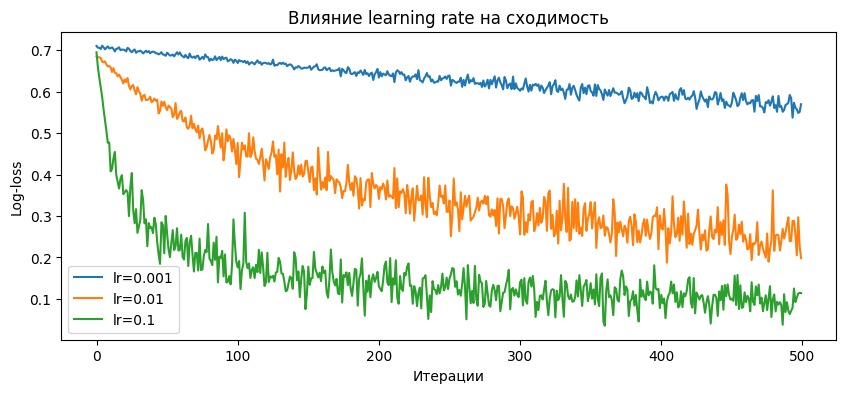

In [ ]:
def train_logistic(X, y, lr=0.01, n_epochs=300, batch_size=32):
    m, n = X.shape
    w = np.random.randn(n, 1) * 0.01
    losses = []
    for epoch in range(n_epochs):
        idx = np.random.permutation(m)
        for i in range(0, m, batch_size):
            batch_idx = idx[i:min(i+batch_size, m)]
            Xb, yb = X[batch_idx], y[batch_idx]
            z = Xb.dot(w)
            y_hat = sigmoid(z)
            loss = logistic_loss(yb, y_hat)
            grad = Xb.T.dot(y_hat - yb) / len(yb)
            w -= lr * grad
            losses.append(loss)
    return w, losses

lrs = [0.001, 0.01, 0.1]
plt.figure(figsize=(10, 4))

for lr in lrs:
    _, losses = train_logistic(X_train_clf, y_train_clf, lr=lr, n_epochs=200, batch_size=32)
    plt.plot(losses[:500], label=f"lr={lr}")

plt.xlabel("Итерации")
plt.ylabel("Log-loss")
plt.title("Влияние learning rate на сходимость")
plt.legend()
plt.show()
